# METAWORLD_ADVANCED_PYTHON_GENERATORS(11Nov22)




__- Generators allow us to generate as we go along, instead of holding everything in memory.__<br>

__- We've learned how to create functions with <code>def</code> and the <code>return</code> statement.__<br>

__- Generator functions allow us to write a function that can send back a value and then later resume to pick up where it left off. This type of function is a generator in Python, allowing us to generate a sequence of values over time. The main difference in syntax will be the use of a <code>yield</code> statement.__<br>





---

__- In most aspects, a generator function will appear very similar to a normal function.__<br>

__- The main difference is when a generator function is compiled they become an object that supports an iteration protocol.__ 
__That means when they are called in your code they don't actually return a value and then exit.__<br>

__- Instead, generator functions will automatically suspend and resume their execution and state around the last point of value generation.__<br>

__- The main advantage here is that instead of having to compute an entire series of values up front, the generator computes one value and then suspends its activity awaiting the next instruction. This feature is known as *state suspension*__<br>

￼￼To start getting a better understanding of generators, let's go ahead and see how we can create some.

---

__- This type of function is a generator in Python, allowing us to generate a sequence of values over time. The main difference in syntax will be the use of <code>yield</code> statement.__<br>

__- When a generator function is compiled they become an object that supports an iteration protocol.__<br>

__- That means when they are called in your code, they don't actually return a value and then exit.__<br>

__- That means when they are called in your code, they don't actually return a value and then exit.__<br>

---

### For example:

__- The range() function dose not produce a list in memory for all the values from start to stop. Instead, it just keeps track of the last number and the step size, to provide a flow of numbers.__<br>

In [8]:
range(10)

range(0, 10)

__- If a user did need the list, they have to transform the generator to a list with <code>list(range(0, 10))<code>.__<br>

In [3]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
for num in range(10) :
    print(num)

0
1
2
3
4
5
6
7
8
9


---

## How to create our own generators?

In [12]:
# Generator function for the cube of numbers (power of 3)

def cubes(n) :
    
    result = []
    
    for x in range(n) :
        result.append(x**3)
        
    return result

In [13]:
cubes(10)          

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

  __- Keeping entire list in memory. Not memory efficient. (Not computer cost effective)__<br>

 __- What if we did not need the whole list at a time?__<br>

In [15]:
for i in cubes(10) :     
    print(i)

0
1
8
27
64
125
216
343
512
729



 __- Can we do this with a generator?__<br>

In [16]:
def cubes(n) :
    
    # result = [] --> we don't need this.
    
    for x in range(n) :
        # result.append(x**3)
    # return result
        yield x ** 3

In [17]:
for i in cubes(10) :      
    print(i)

0
1
8
27
64
125
216
343
512
729


__-This is now way more memory efficient__<br>

__-If I had to use very big numbers like <code>for x in cubes(100000)</code>, it's more logical to use generators__<br>

In [18]:
cubes(10)

<generator object cubes at 0x0000016B65EB5970>

__The code above 👆 shows that it's a generator object at this location in memory__<br>

In [19]:
type(cubes(10))

generator

In [20]:
list(cubes(10))

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

__Let's deep dive with another example__<br>

__Fibonacci Numbers__<br>

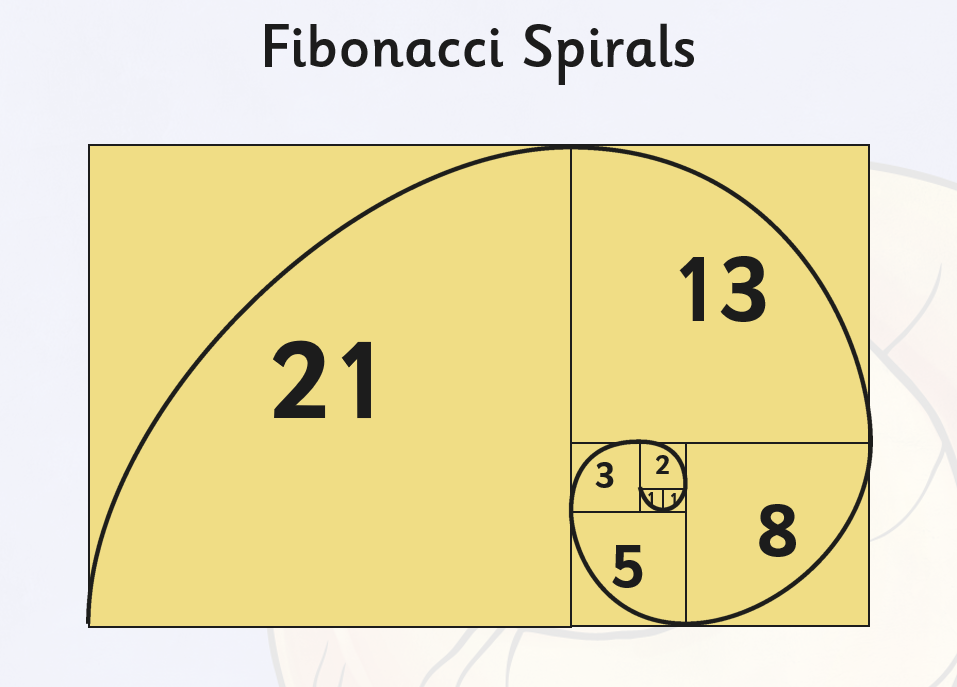

__In mathematics, the Fibonacci numbers, commonly denoted Fn , form a sequence, the Fibonacci sequence, in which each number is the sum of the two preceding ones. The sequence commonly starts from 0 and 1, although some authors start the sequence from 1 and 1 or sometimes (as did Fibonacci) from 1 and 2. Starting from 0 and 1, the first few values in the sequence are:__<br><br>

__0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144__<br>

In [21]:
def gen_fibon(n) :
    
    a = 1
    b = 1
    
    for i in range(n) :
        yield a
        a, b = b, a + b
    
    

In [24]:
for num in gen_fibon(11) :
    print(num)

1
1
2
3
5
8
13
21
34
55
89


In [22]:
gen_fibon(5)

<generator object gen_fibon at 0x0000016B6633D040>

In [23]:
list(gen_fibon(5))

[1, 1, 2, 3, 5]

__What if we do this with a normal function__<br>

In [25]:
def gen_fibon(n) :
    
    a = 1
    b = 1
    output = []
    
    for i in range(n) :
        output.append(a)
        a, b = b, a + b
        
    return output
        
    

In [27]:
gen_fibon(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [26]:
for num in gen_fibon(10) :
    print(num)

1
1
2
3
5
8
13
21
34
55


In [28]:
type(gen_fibon)

function

__The function above 👆 produces the same result, but not efficient. Because, it put all the numbers to output list. So, if you're dealing with huge numbers, using generators might be more efficient__<br>

---

## next() and iter() built-in functions

### next() built-in function

__The next() function allows us to access the next element in a sequence. Lets check it out:__<br>

In [35]:
def simple_gen() :
    
    for x in range(3) :
        
        yield x

In [36]:
for number in simple_gen() :
    print(number)

0
1
2


In [49]:
g = simple_gen()

In [50]:
g

<generator object simple_gen at 0x0000016B66573040>

In [52]:
print(next(g))

0


In [55]:
print(next(g))

1


In [56]:
print(next(g))

2


In [57]:
print(next(g))

StopIteration: 

__After yielding all the values next() caused a StopIteration error. What this error informs us of is that all the values have been yielded.__<br> 

__You might be wondering that why don’t we get this error while using a for loop? A for loop automatically catches this error and stops calling next().__<br>

### iter() built-in function

__You remember that strings are iterables. But that doesn't mean the string itself is an *iterator*! We can check this with the next() function:__<br> 

In [58]:
s = "hello"

In [59]:
for letter in s :
    print(letter)

h
e
l
l
o


In [62]:
print(next(s))

TypeError: 'str' object is not an iterator

 __Interesting, this means that a string object supports iteration, but we can not directly iterate over it as we could with a generator function. The iter() function allows us to do just that!__<br> 

In [63]:
s_iter = iter(s)

In [64]:
next(s_iter)

'h'

In [65]:
next(s_iter)

'e'

In [66]:
next(s_iter)

'l'

In [67]:
next(s_iter)

'l'

In [68]:
next(s_iter)

'o'

In [69]:
next(s_iter)

StopIteration: 

 __The main takeaway from this lecture is that using the yield keyword at a function will cause the function to become a generator. This change can save you a lot of memory for large use cases.__<br> 

## Some Challenges

### Challenge-1

#### Task :

__Create a generator that generates the squares of numbers up to some number n and print the generator.__

#### Solution :

In [1]:
def gensquares(n):
    for i in range(n):
        yield i**2

In [2]:
for x in gensquares(10):
    print(x)

0
1
4
9
16
25
36
49
64
81


---

### Challenge-2

#### Task :

__Create a generator that yields "n" random numbers between a low and high number (that are inputs).<br>Note: Use the random library. For example:.__

In [70]:
import random

random.randint(1,10)

7

#### Solution :

In [4]:
def rand_num(low,high,n):
    
    for i in range(n):
        yield random.randint(low, high)

In [5]:
for num in rand_num(1,10,12):
    print(num)

3
9
6
10
8
4
5
5
5
3
5
8


---

### Challenge-3

#### Task :

__Use the iter() function to convert the string below into an iterator::.__

In [71]:
a = "Metaworld"

In [72]:
a = iter(a)

In [73]:
next(a)

'M'

---

### Challenge-4

#### Task :

__Explain a use case for a generator using a yield statement where you would not want to use a normal function with a return statement.__

#### Solution :

**If the output has the potential of taking up a large amount of memory and you only intend to iterate through it, you would want to use a generator. (Multiple answers are acceptable here!)**

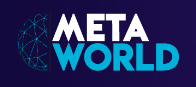